In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
from zipfile import ZipFile
file_name = "/content/gdrive/MyDrive/Colab Notebooks/FER/archive.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator


In [3]:
folder_path = "/content/images/"
picture_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(rescale=1./255);
datagen_val = ImageDataGenerator(rescale=1./255);

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size = (picture_size, picture_size),
    batch_size = batch_size,
    color_mode = "grayscale",
    class_mode = "categorical",
    shuffle = True
)

validation_set = datagen_val.flow_from_directory(
    folder_path + "validation",
    target_size = (picture_size, picture_size),
    batch_size = batch_size,
    color_mode = "grayscale",
    class_mode = "categorical",
    shuffle = False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [2]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [5]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit(
        train_set,
        steps_per_epoch=28821 // 64,
        epochs=50,
        validation_data=validation_set,
        validation_steps=7066 // 64)

Epoch 1/50
450/450 [==============================] - 20s 40ms/step - loss: 1.7972 - accuracy: 0.2585 - val_loss: 1.6839 - val_accuracy: 0.3557
Epoch 2/50
450/450 [==============================] - 17s 38ms/step - loss: 1.6284 - accuracy: 0.3671 - val_loss: 1.5540 - val_accuracy: 0.4178
Epoch 3/50
450/450 [==============================] - 17s 38ms/step - loss: 1.5304 - accuracy: 0.4111 - val_loss: 1.4777 - val_accuracy: 0.4413
Epoch 4/50
450/450 [==============================] - 17s 38ms/step - loss: 1.4565 - accuracy: 0.4439 - val_loss: 1.3994 - val_accuracy: 0.4672
Epoch 5/50
450/450 [==============================] - 17s 38ms/step - loss: 1.3997 - accuracy: 0.4677 - val_loss: 1.3415 - val_accuracy: 0.4899
Epoch 6/50
450/450 [==============================] - 18s 39ms/step - loss: 1.3440 - accuracy: 0.4888 - val_loss: 1.3082 - val_accuracy: 0.5037
Epoch 7/50
450/450 [==============================] - 17s 38ms/step - loss: 1.3030 - accuracy: 0.5064 - val_loss: 1.2659 - val_accuracy:

In [6]:
emotion_model.save('model.h5')

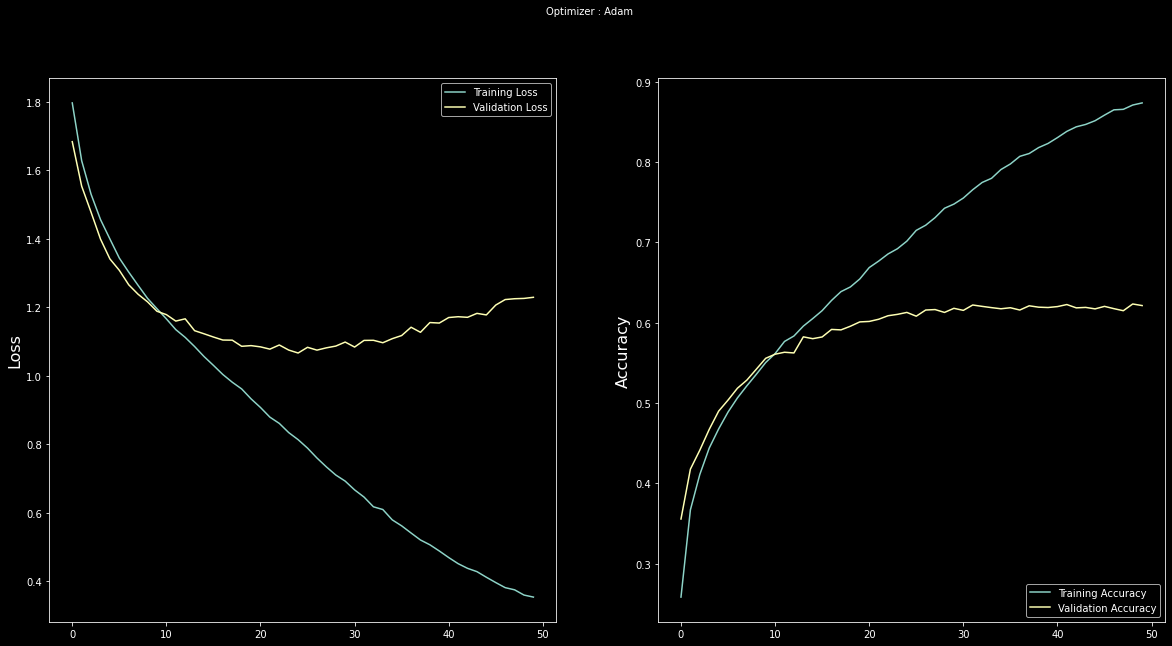

In [11]:
#accuracy
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion_model_info.history['accuracy'], label='Training Accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()